In [3]:
import pickle
with open("medical_insurance.pkl", "rb") as f:
    text = pickle.load(f)
    
import warnings 
warnings.filterwarnings("ignore")

### Filling outliers with median

## 1. bmi

In [4]:
df_medic_insu = text[6]
df_medic_insu

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [5]:
def oulier_detection(col_name):
    #outlier detection
    #df_medic_insu[[col_name]].boxplot()
    
    #outlier calculation
    Q1 = df_medic_insu[col_name].quantile(0.25)
    Q2 = df_medic_insu[col_name].quantile(0.5)
    Q3 = df_medic_insu[col_name].quantile(0.75)
    median = df_medic_insu[col_name].median()
    minimum = df_medic_insu[col_name].min()
    maximum = df_medic_insu[col_name].max()
    
    IQR = Q3 - Q1
    
    global uppear_tail, lower_tail
    uppear_tail = Q3 + 1.5 * IQR
    lower_tail = Q1 - 1.5 * IQR
    
    condition = (df_medic_insu[col_name] > uppear_tail) | (df_medic_insu[col_name] < lower_tail)
    outliers = df_medic_insu[col_name].loc[condition]

In [6]:
oulier_detection("bmi")
median_bmi_woutliers = df_medic_insu[["bmi"]].loc[df_medic_insu["bmi"] < uppear_tail ].median()[0]
median_bmi_woutliers

30.3

In [8]:
df_medic_insu["bmi"].loc[df_medic_insu["bmi"] > uppear_tail] = median_bmi_woutliers

In [9]:
df_medic_insu["bmi"].loc[df_medic_insu["bmi"] > uppear_tail]

Series([], Name: bmi, dtype: float64)

<AxesSubplot:>

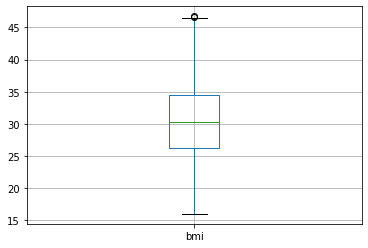

In [10]:
df_medic_insu[["bmi"]].boxplot()

## Model

In [11]:
linear_mod = text[1]
linear_mod

LinearRegression()

In [12]:
from sklearn.model_selection import train_test_split
x = df_medic_insu.drop("charges", axis= 1)
y = df_medic_insu["charges"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state= 18)

In [13]:
linear_mod.fit(x_train, y_train)

LinearRegression()

In [14]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# training data
y_train_pred = linear_mod.predict(x_train)

mse_train = mean_squared_error(y_train , y_train_pred)
print("MSE --> ", mse_train)

rmse_train = np.sqrt(mse_train)
print("RMSE --> ", rmse_train)

mae_train = mean_absolute_error(y_train , y_train_pred)
print("MAE --> ", mae_train)

r2_score_train = r2_score(y_train , y_train_pred)
print("r_squared -- > ", r2_score_train)

adj_r_squared_train = 1 - (1 - r2_score_train)*(x.shape[0] - 1 )/(x.shape[0] - x.shape[1] - 1)
print("Adj rsquared -- >", adj_r_squared_train)

MSE -->  37068148.04964829
RMSE -->  6088.361688471562
MAE -->  4093.4947114384945
r_squared -- >  0.7385534164738663
Adj rsquared -- > 0.7367815646276802


In [15]:
# testing data
y_test_pred = linear_mod.predict(x_test)

mse_test = mean_squared_error(y_test , y_test_pred)
print("MSE --> ", mse_test)

rmse_test = np.sqrt(mse_test)
print("RMSE --> ", rmse_test)

mae_test = mean_absolute_error(y_test , y_test_pred)
print("MAE --> ", mae_test)

r2_score_test = r2_score(y_test , y_test_pred)
print("r_squared -- > ", r2_score_test)

adj_r_squared_test = 1 - (1 - r2_score_test)*(x.shape[0] - 1 )/(x.shape[0] - x.shape[1] - 1)
print("Adj rsquared -- >", adj_r_squared_test)

MSE -->  35963598.04957963
RMSE -->  5996.965736902257
MAE -->  4177.928868523281
r_squared -- >  0.7759403068232777
Adj rsquared -- > 0.7744218299869897


## Filling outliers with mean

In [16]:
df_medic_insu = text[6]
df_medic_insu

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [17]:
oulier_detection("bmi")
mean_bmi_woutliers = df_medic_insu["bmi"].loc[df_medic_insu["bmi"] < uppear_tail ].mean()
mean_bmi_woutliers

30.511515718562876

In [18]:
df_medic_insu["bmi"].loc[df_medic_insu["bmi"] > uppear_tail] = mean_bmi_woutliers

In [19]:
df_medic_insu["bmi"].loc[df_medic_insu["bmi"] > uppear_tail ]

Series([], Name: bmi, dtype: float64)

In [20]:
from sklearn.model_selection import train_test_split
x = df_medic_insu.drop("charges", axis= 1)
y = df_medic_insu["charges"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state= 18)

In [21]:
linear_mod.fit(x_train, y_train)

LinearRegression()

In [22]:
# training data
y_train_pred = linear_mod.predict(x_train)

mse_train = mean_squared_error(y_train , y_train_pred)
print("MSE --> ", mse_train)

rmse_train = np.sqrt(mse_train)
print("RMSE --> ", rmse_train)

mae_train = mean_absolute_error(y_train , y_train_pred)
print("MAE --> ", mae_train)

r2_score_train = r2_score(y_train , y_train_pred)
print("r_squared -- > ", r2_score_train)

adj_r_squared_train = 1 - (1 - r2_score_train)*(x.shape[0] - 1 )/(x.shape[0] - x.shape[1] - 1)
print("Adj rsquared -- >", adj_r_squared_train)

MSE -->  37001827.18592361
RMSE -->  6082.912722201726
MAE -->  4095.541205136167
r_squared -- >  0.739021186355817
Adj rsquared -- > 0.7372525046368429


In [23]:
# testing data
y_test_pred = linear_mod.predict(x_test)

mse_test = mean_squared_error(y_test , y_test_pred)
print("MSE --> ", mse_test)

rmse_test = np.sqrt(mse_test)
print("RMSE --> ", rmse_test)

mae_test = mean_absolute_error(y_test , y_test_pred)
print("MAE --> ", mae_test)

r2_score_test = r2_score(y_test , y_test_pred)
print("r_squared -- > ", r2_score_test)

adj_r_squared_test = 1 - (1 - r2_score_test)*(x.shape[0] - 1 )/(x.shape[0] - x.shape[1] - 1)
print("Adj rsquared -- >", adj_r_squared_test)

MSE -->  35923914.40912175
RMSE -->  5993.65618042291
MAE -->  4187.616583453539
r_squared -- >  0.7761875430506673
Adj rsquared -- > 0.774670741761101


### Filling outliers with uppertail

In [24]:
df_medic_insu = text[6]
df_medic_insu

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [25]:
oulier_detection("bmi")
df_medic_insu["bmi"].loc[df_medic_insu["bmi"] > uppear_tail] = uppear_tail
df_medic_insu["bmi"].loc[df_medic_insu["bmi"] > uppear_tail ]

Series([], Name: bmi, dtype: float64)

In [26]:
from sklearn.model_selection import train_test_split
x = df_medic_insu.drop("charges", axis= 1)
y = df_medic_insu["charges"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state= 18)
linear_mod.fit(x_train, y_train)

LinearRegression()

In [27]:
# training data
y_train_pred = linear_mod.predict(x_train)

mse_train = mean_squared_error(y_train , y_train_pred)
print("MSE --> ", mse_train)

rmse_train = np.sqrt(mse_train)
print("RMSE --> ", rmse_train)

mae_train = mean_absolute_error(y_train , y_train_pred)
print("MAE --> ", mae_train)

r2_score_train = r2_score(y_train , y_train_pred)
print("r_squared -- > ", r2_score_train)

adj_r_squared_train = 1 - (1 - r2_score_train)*(x.shape[0] - 1 )/(x.shape[0] - x.shape[1] - 1)
print("Adj rsquared -- >", adj_r_squared_train)

MSE -->  37001827.18592361
RMSE -->  6082.912722201726
MAE -->  4095.541205136167
r_squared -- >  0.739021186355817
Adj rsquared -- > 0.7372525046368429


In [28]:
# testing data
y_test_pred = linear_mod.predict(x_test)

mse_test = mean_squared_error(y_test , y_test_pred)
print("MSE --> ", mse_test)

rmse_test = np.sqrt(mse_test)
print("RMSE --> ", rmse_test)

mae_test = mean_absolute_error(y_test , y_test_pred)
print("MAE --> ", mae_test)

r2_score_test = r2_score(y_test , y_test_pred)
print("r_squared -- > ", r2_score_test)

adj_r_squared_test = 1 - (1 - r2_score_test)*(x.shape[0] - 1 )/(x.shape[0] - x.shape[1] - 1)
print("Adj rsquared -- >", adj_r_squared_test)

MSE -->  35923914.40912175
RMSE -->  5993.65618042291
MAE -->  4187.616583453539
r_squared -- >  0.7761875430506673
Adj rsquared -- > 0.774670741761101


## Transformation

### 1. log transformation

In [29]:
import numpy as np
df_medic_insu = text[6]
df_medic_insu["bmi"] = np.log(df_medic_insu["bmi"])
df_medic_insu

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,3.328627,0,1,16884.92400,0,0,0,1
1,18,1,3.519573,1,0,1725.55230,0,0,1,0
2,28,1,3.496508,3,0,4449.46200,0,0,1,0
3,33,1,3.122585,0,0,21984.47061,0,1,0,0
4,32,1,3.363149,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,3.433019,3,0,10600.54830,0,1,0,0
1334,18,0,3.463233,0,0,2205.98080,1,0,0,0
1335,18,0,3.606856,0,0,1629.83350,0,0,1,0
1336,21,0,3.250374,0,0,2007.94500,0,0,0,1


In [57]:
#correlation
correlation = df_medic_insu.corr()
correlation = correlation[["charges"]].T
correlation

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
charges,0.299008,0.057292,-0.187945,0.067998,0.787251,1.0,0.006349,-0.039905,0.073982,-0.04321


<AxesSubplot:>

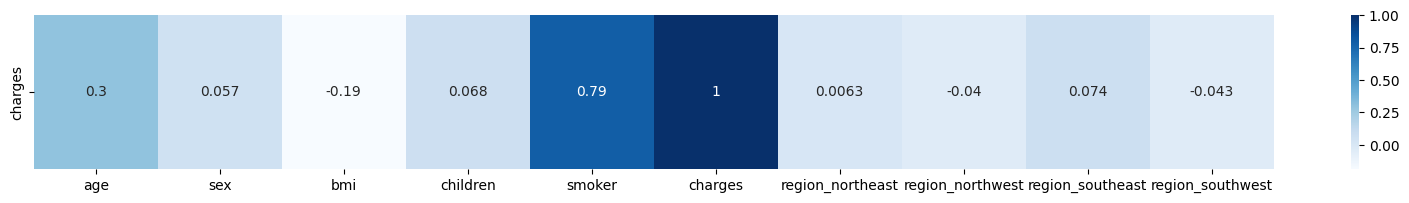

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
sns.heatmap(correlation, annot=True, cmap= "Blues")

<AxesSubplot:>

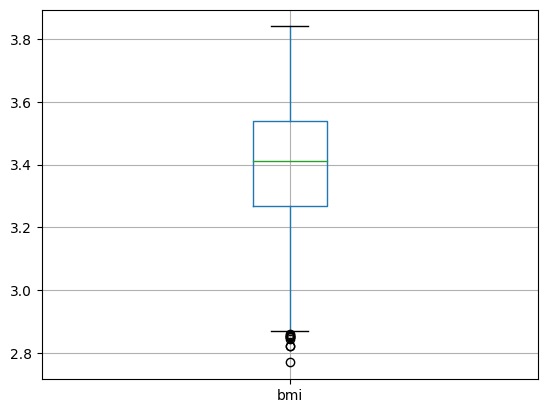

In [32]:
df_medic_insu[["bmi"]].boxplot()

In [33]:
from sklearn.model_selection import train_test_split
x = df_medic_insu.drop("charges", axis= 1)
y = df_medic_insu["charges"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state= 18)
linear_mod.fit(x_train, y_train)

LinearRegression()

In [34]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# training data
y_train_pred = linear_mod.predict(x_train)

mse_train = mean_squared_error(y_train , y_train_pred)
print("MSE --> ", mse_train)

rmse_train = np.sqrt(mse_train)
print("RMSE --> ", rmse_train)

mae_train = mean_absolute_error(y_train , y_train_pred)
print("MAE --> ", mae_train)

r2_score_train = r2_score(y_train , y_train_pred)
print("r_squared -- > ", r2_score_train)

adj_r_squared_train = 1 - (1 - r2_score_train)*(x.shape[0] - 1 )/(x.shape[0] - x.shape[1] - 1)
print("Adj rsquared -- >", adj_r_squared_train)

MSE -->  36958370.86692017
RMSE -->  6079.339673592863
MAE -->  4147.5596805303085
r_squared -- >  0.7393276895596149
Adj rsquared -- > 0.7375610850460882


In [35]:
# testing data
y_test_pred = linear_mod.predict(x_test)

mse_test = mean_squared_error(y_test , y_test_pred)
print("MSE --> ", mse_test)

rmse_test = np.sqrt(mse_test)
print("RMSE --> ", rmse_test)

mae_test = mean_absolute_error(y_test , y_test_pred)
print("MAE --> ", mae_test)

r2_score_test = r2_score(y_test , y_test_pred)
print("r_squared -- > ", r2_score_test)

adj_r_squared_test = 1 - (1 - r2_score_test)*(x.shape[0] - 1 )/(x.shape[0] - x.shape[1] - 1)
print("Adj rsquared -- >", adj_r_squared_test)

MSE -->  35772833.22550541
RMSE -->  5981.039477006101
MAE -->  4235.640325984003
r_squared -- >  0.7771288060355106
Adj rsquared -- > 0.7756183837872572


### 2. cuberoot transformation

In [36]:
df_medic_insu = text[6]
df_medic_insu["bmi"] = np.cbrt(df_medic_insu["bmi"])
df_medic_insu

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,1.493098,0,1,16884.92400,0,0,0,1
1,18,1,1.521119,1,0,1725.55230,0,0,1,0
2,28,1,1.517789,3,0,4449.46200,0,0,1,0
3,33,1,1.461632,0,0,21984.47061,0,1,0,0
4,32,1,1.498242,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,1.508547,3,0,10600.54830,0,1,0,0
1334,18,0,1.512959,0,0,2205.98080,1,0,0,0
1335,18,0,1.533591,0,0,1629.83350,0,0,1,0
1336,21,0,1.481305,0,0,2007.94500,0,0,0,1


In [59]:
#correlation
correlation = df_medic_insu.corr()
correlation = correlation[["charges"]].T
correlation

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
charges,0.299008,0.057292,-0.187945,0.067998,0.787251,1.0,0.006349,-0.039905,0.073982,-0.04321


<AxesSubplot:>

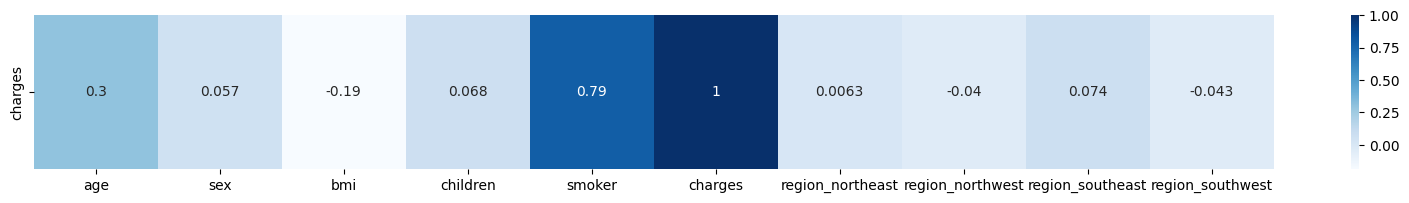

In [60]:
plt.figure(figsize= (20,2))
sns.heatmap(correlation, annot= True, cmap= "Blues")

<AxesSubplot:>

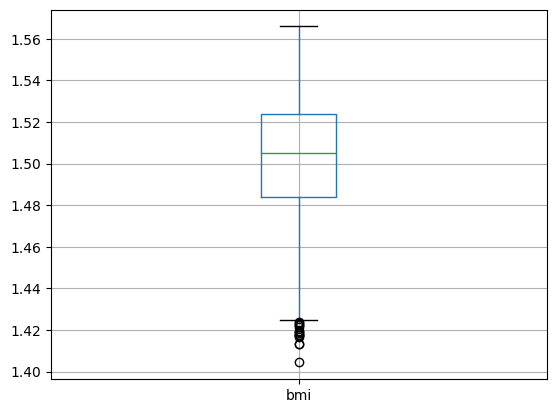

In [39]:
df_medic_insu[["bmi"]].boxplot()

In [40]:
from sklearn.model_selection import train_test_split
x = df_medic_insu.drop("charges", axis= 1)
y = df_medic_insu["charges"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state= 18)
linear_mod.fit(x_train, y_train)

LinearRegression()

In [41]:
# training data
y_train_pred = linear_mod.predict(x_train)

mse_train = mean_squared_error(y_train , y_train_pred)
print("MSE --> ", mse_train)

rmse_train = np.sqrt(mse_train)
print("RMSE --> ", rmse_train)

mae_train = mean_absolute_error(y_train , y_train_pred)
print("MAE --> ", mae_train)

r2_score_train = r2_score(y_train , y_train_pred)
print("r_squared -- > ", r2_score_train)

adj_r_squared_train = 1 - (1 - r2_score_train)*(x.shape[0] - 1 )/(x.shape[0] - x.shape[1] - 1)
print("Adj rsquared -- >", adj_r_squared_train)

MSE -->  36968471.01775539
RMSE -->  6080.170311574782
MAE -->  4155.612617913101
r_squared -- >  0.7392564518510186
Adj rsquared -- > 0.7374893645518161


In [42]:
# testing data
y_test_pred = linear_mod.predict(x_test)

mse_test = mean_squared_error(y_test , y_test_pred)
print("MSE --> ", mse_test)

rmse_test = np.sqrt(mse_test)
print("RMSE --> ", rmse_test)

mae_test = mean_absolute_error(y_test , y_test_pred)
print("MAE --> ", mae_test)

r2_score_test = r2_score(y_test , y_test_pred)
print("r_squared -- > ", r2_score_test)

adj_r_squared_test = 1 - (1 - r2_score_test)*(x.shape[0] - 1 )/(x.shape[0] - x.shape[1] - 1)
print("Adj rsquared -- >", adj_r_squared_test)

MSE -->  35781681.84925375
RMSE -->  5981.779154169247
MAE -->  4244.579636464931
r_squared -- >  0.7770736775158514
Adj rsquared -- > 0.7755628816556426


### 3. reciprocal tranformation

In [43]:
df_medic_insu = text[6]
#df_medic_insu
df_medic_insu["bmi"] = np.reciprocal(df_medic_insu["bmi"])
df_medic_insu

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,0.669748,0,1,16884.92400,0,0,0,1
1,18,1,0.657411,1,0,1725.55230,0,0,1,0
2,28,1,0.658853,3,0,4449.46200,0,0,1,0
3,33,1,0.684167,0,0,21984.47061,0,1,0,0
4,32,1,0.667449,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,0.662890,3,0,10600.54830,0,1,0,0
1334,18,0,0.660956,0,0,2205.98080,1,0,0,0
1335,18,0,0.652064,0,0,1629.83350,0,0,1,0
1336,21,0,0.675080,0,0,2007.94500,0,0,0,1


In [61]:
#correlation
correlation = df_medic_insu.corr()
correlation = correlation[["charges"]].T
correlation

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
charges,0.299008,0.057292,-0.187945,0.067998,0.787251,1.0,0.006349,-0.039905,0.073982,-0.04321


<AxesSubplot:>

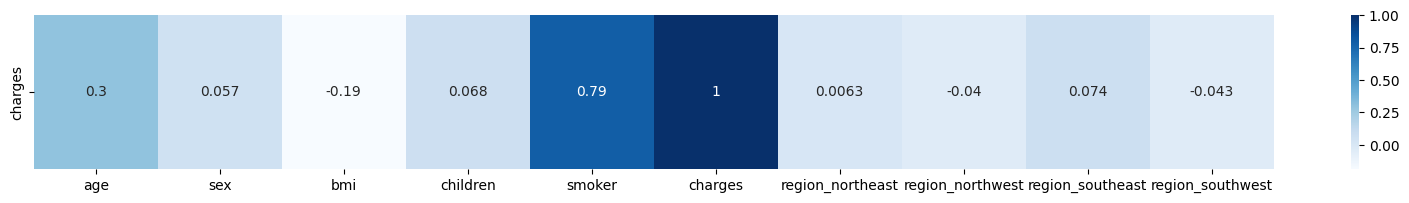

In [62]:
plt.figure(figsize= (20,2))
sns.heatmap(correlation, annot= True, cmap= "Blues")

<AxesSubplot:>

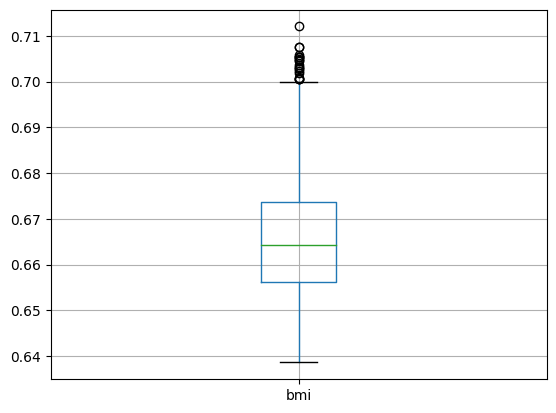

In [46]:
df_medic_insu[["bmi"]].boxplot()

In [47]:
oulier_detection("bmi")
median_bmi_woutliers = df_medic_insu[["bmi"]].loc[df_medic_insu["bmi"] < uppear_tail ].median()[0]
median_bmi_woutliers

0.6640896742606417

In [48]:
df_medic_insu["bmi"].loc[df_medic_insu["bmi"] > uppear_tail] = median_bmi_woutliers

In [49]:
df_medic_insu["bmi"].loc[df_medic_insu["bmi"] > uppear_tail]

Series([], Name: bmi, dtype: float64)

<AxesSubplot:>

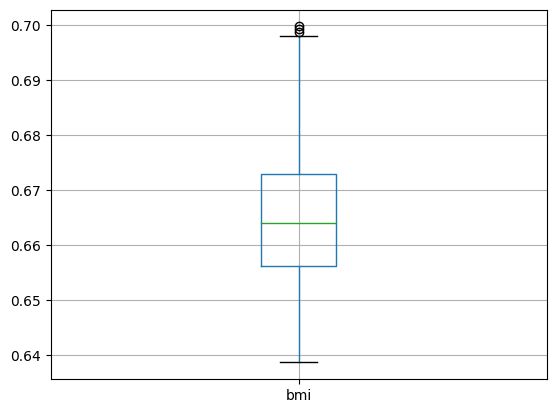

In [50]:
df_medic_insu[["bmi"]].boxplot()

In [51]:
from sklearn.model_selection import train_test_split
x = df_medic_insu.drop("charges", axis= 1)
y = df_medic_insu["charges"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state= 18)
linear_mod.fit(x_train, y_train)

LinearRegression()

In [52]:
# training data
y_train_pred = linear_mod.predict(x_train)

mse_train = mean_squared_error(y_train , y_train_pred)
print("MSE --> ", mse_train)

rmse_train = np.sqrt(mse_train)
print("RMSE --> ", rmse_train)

mae_train = mean_absolute_error(y_train , y_train_pred)
print("MAE --> ", mae_train)

r2_score_train = r2_score(y_train , y_train_pred)
print("r_squared -- > ", r2_score_train)

adj_r_squared_train = 1 - (1 - r2_score_train)*(x.shape[0] - 1 )/(x.shape[0] - x.shape[1] - 1)
print("Adj rsquared -- >", adj_r_squared_train)

MSE -->  37221207.713675074
RMSE -->  6100.918595889891
MAE -->  4136.527893001985
r_squared -- >  0.7374738662847966
Adj rsquared -- > 0.7356946982099195


In [53]:
# testing data
y_test_pred = linear_mod.predict(x_test)

mse_test = mean_squared_error(y_test , y_test_pred)
print("MSE --> ", mse_test)

rmse_test = np.sqrt(mse_test)
print("RMSE --> ", rmse_test)

mae_test = mean_absolute_error(y_test , y_test_pred)
print("MAE --> ", mae_test)

r2_score_test = r2_score(y_test , y_test_pred)
print("r_squared -- > ", r2_score_test)

adj_r_squared_test = 1 - (1 - r2_score_test)*(x.shape[0] - 1 )/(x.shape[0] - x.shape[1] - 1)
print("Adj rsquared -- >", adj_r_squared_test)

MSE -->  35894064.80110955
RMSE -->  5991.165562819104
MAE -->  4218.912221795211
r_squared -- >  0.7763735114847332
Adj rsquared -- > 0.7748579705234099
